#EXERCISE 12.1

###MINST image recognition with DNN

In this exercise I change my DNN and analyze the impact of different optimizers on it

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28 # number of pixels
num_classes = 10 # 10 digits

#Load MINST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

def compile_model(opt):
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

I chose 3 different optimizers to compare:



*   SGD
*   ADAM
*   RMSprop

The training was done along 25 epochs.

Given the time length of the training, I implemented an early stopping method, which checks if accuracy doesn't improve along the last 4 epochs, and if so stops the training.
This also has the advantage of helping to prevent overfitting

In [3]:
#create and train model #BEWARE: 13 minutes long!
batch_size = 32
epochs = 25
opts = ['sgd', 'adam', 'RMSprop' ]
history_list = [0]*len(opts)

callback = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, restore_best_weights = True)
for i in range(len(opts)):
  model_DNN = compile_model(opts[i])

  history_list[i] = model_DNN.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            callbacks = [callback],
            shuffle=True,
            verbose=1,
            validation_data=(X_test, Y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.6346 - loss: 1.1800 - val_acc: 0.9120 - val_loss: 0.3200
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.8822 - loss: 0.4175 - val_acc: 0.9308 - val_loss: 0.2436
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9078 - loss: 0.3265 - val_acc: 0.9387 - val_loss: 0.2062
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9209 - loss: 0.2787 - val_acc: 0.9467 - val_loss: 0.1775
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.9324 - loss: 0.2433 - val_acc: 0.9532 - val_loss: 0.1575
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9392 - loss: 0.2195 - val_acc: 0.9572 - val_loss: 0.1445
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9441 - loss: 0.1998 - val_acc: 0.9610 - val_loss: 0.1314
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.9487 - loss: 0.1818 - val_acc: 0.9621 - val_loss: 0.1243
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━

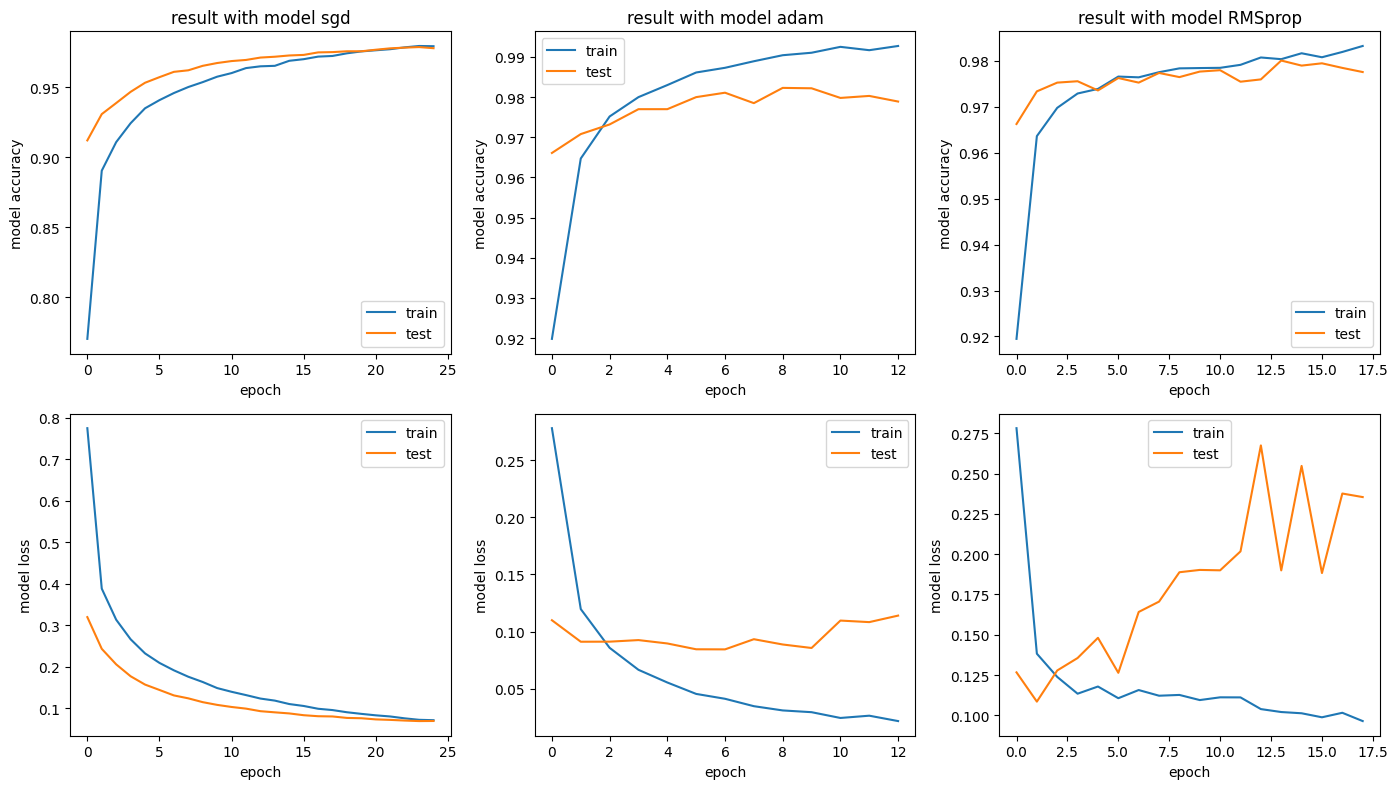

In [4]:
fig, ax = plt.subplots(2,3, figsize = (14,8))

# summarize history for accuracy
for i in range(len(opts)):
  history = history_list[i]
  ax[0][i].plot(history.history['acc'])
  ax[0][i].plot(history.history['val_acc'])
  ax[0][i].legend(['train', 'test'], loc='best')
  ax[0][i].set(xlabel = 'epoch', ylabel = 'model accuracy', title = 'result with model ' + opts[i])


  # summarize history for loss
  ax[1][i].plot(history.history['loss'])
  ax[1][i].plot(history.history['val_loss'])
  ax[1][i].legend(['train', 'test'], loc='best')
  ax[1][i].set(xlabel = 'epoch', ylabel = 'model loss')

plt.tight_layout()
plt.show()

As we can see, the highest validation accuracy was reached by ADAM, with RMSprop as a close second. Even so, both optimizers bring much larger fluctuations in the training and, most importantly, test accuracy than the SDG, which behaves more smoothly.

ADAM and RMSprop also present rising test loss function along the epochs. This could be due to overfitting. Indeed, the early stopping method blocked the training using these two optimizers along the 13-th and 18-th epoch, respectively.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


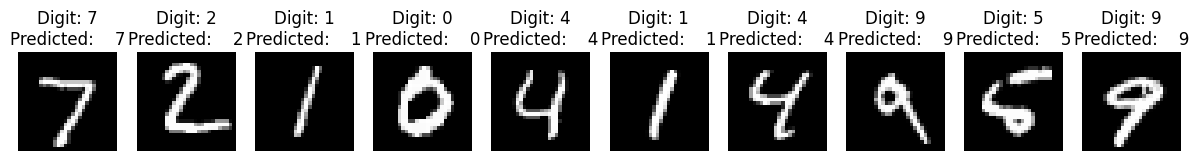

In [5]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

#EXERCISE 12.2

###Building a CNN

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [6]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


For my new net atchitecture i chose:



*   A starting Conv2D layer with 10 filters (5x5 kernel) to capture basic features
*   A maxpooling layer to coarse-grain spatial information by performing a subsampling
*   Another round of Convolutional + maxpooling layer with 32 filters (3x3 kernel)
*   Dropout to prevent overfitting
*   Flattening
*   two fully connected layers to convert our image matrix into a classification matrix: a fully connected layer with 128 neurons and ReLU activation to learn complex combinations of extracted features, followed by a 10-neuron (number of classes) softmax output layer.

In [7]:
def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D( 32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #dropout and flatten
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #...and a classifier such as a soft-max
    model.add(Dense(10, activation='softmax'))


    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [15]:
# training parameters
batch_size = 32
epochs = 15

# create the deep conv net
model_CNN=create_CNN()

# train CNN   BEWARE: 10 minutes!
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - acc: 0.5630 - loss: 1.2829 - val_acc: 0.9529 - val_loss: 0.1626
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - acc: 0.9287 - loss: 0.2363 - val_acc: 0.9675 - val_loss: 0.1039
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.9494 - loss: 0.1664 - val_acc: 0.9755 - val_loss: 0.0774
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - acc: 0.9568 - loss: 0.1393 - val_acc: 0.9787 - val_loss: 0.0661
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - acc: 0.9634 - loss: 0.1183 - val_acc: 0.9813 - val_loss: 0.0556
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - acc: 0.9680 - loss: 0.1058 - val_acc: 0.9835 - val_loss: 0.0505
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - acc: 0.9693 - loss: 0.0993 - val_acc: 0.9847 - val_loss: 0.0466
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - acc: 0.9717 - loss: 0.0910 - val_acc: 0.9861 - val_loss: 0.0429
Epoch 9/15
1875/1875 ━━━

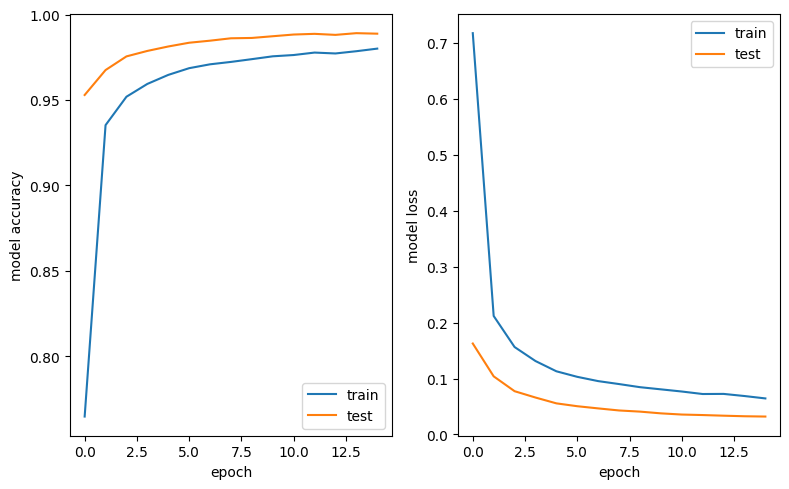

In [16]:
fig, ax = plt.subplots(1,2, figsize = (8,5))

# summarize history for accuracy
ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].legend(['train', 'test'], loc='best')
ax[0].set(xlabel = 'epoch', ylabel = 'model accuracy')


# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].legend(['train', 'test'], loc='best')
ax[1].set(xlabel = 'epoch', ylabel = 'model loss')

plt.tight_layout()
plt.show()

The CNN seems slightly better than the DNN, with faster improvement, and better accuracy, reaching in far less epochs the value of the more accurate tests of the latter analysis.

#EXERCISE 12.3

###Test of the CNN with new data

I created a new unseen dataset by using gimp to draw the 9 digits myself. I tried not to write the digits in the most orderly, straightforward way, in order to challenge the network a bit.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


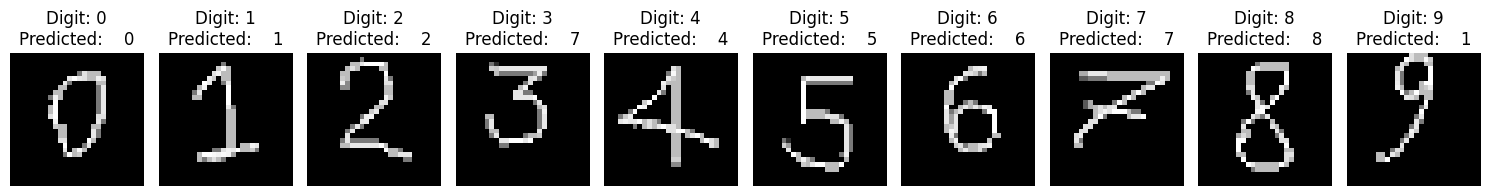

In [21]:
from PIL import Image
import os

images = []

for i in range(10):
    filename = f"gimp_picts/{i}.png"
    digit_in = Image.open(filename).convert('L')

    digit_in = digit_in.resize((28, 28))

    data = np.array(digit_in) / 255.0
    images.append(data)

images = np.array(images)
images = images.reshape(images.shape[0], img_rows, img_cols, 1)
predictions = model_CNN.predict(images)
labels = np.array([0,1,2,3,4,5,6,7,8,9])
labels_plot = keras.utils.to_categorical(labels, num_classes=10)

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(images[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(labels_plot[i]), np.argmax(predictions[i])))
    plt.axis('off')

plt.tight_layout()
plt.show()
plt.close()

The network predicts correctly the new digits 80% of the time. Not being them part of the training data set, I consider it a good result, even though it leaves room for error.